In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [48]:
df = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\New York Crime.csv')
print (df.head(4))
print (len(df))

                             Table 8  Unnamed: 1      Unnamed: 2  \
0                           NEW YORK         NaN             NaN   
1  Offenses Known to Law Enforcement         NaN             NaN   
2                      by City, 2013         NaN             NaN   
3                               City  Population  Violent\ncrime   

                               Unnamed: 3                    Unnamed: 4  \
0                                     NaN                           NaN   
1                                     NaN                           NaN   
2                                     NaN                           NaN   
3  Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1   

                    Unnamed: 5 Unnamed: 6           Unnamed: 7  \
0                          NaN        NaN                  NaN   
1                                     NaN                  NaN   
2                          NaN        NaN                  NaN   
3  Rape\n(legacy\nd

In [11]:
# TO DO: cut first three lines. Replace nan with 0? Get rid of Unnamed 13. 

In [125]:
#Get rid of top three rows and last three
new_df = df.drop([0,1,2, 3, 354, 353, 352])
#Get
#assign row to column names
new_df.columns = df.iloc[3]
#Clean up column names so you can delete some useless columns that are just causing nan issues
new_df.columns = new_df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('\n', '_')
#Get rid of empty rape column
#modcrime= new_df.drop(['Rape_revised_definition1'], axis = 'columns') CAN USE THIS TOO
modcrime= new_df.drop([new_df.columns[4], new_df.columns[13]], axis = 'columns')
print (modcrime.head(10))


3                       City Population Violent_crime  \
4              Adams Village      1,861             0   
5   Addison Town and Village      2,577             3   
6              Akron Village      2,846             3   
7                     Albany     97,956           791   
8             Albion Village      6,388            23   
9             Alfred Village      4,089             5   
10          Allegany Village      1,781             3   
11              Amherst Town    118,296           107   
12        Amityville Village      9,519             9   
13                 Amsterdam     18,182            30   

3  Murder_and_nonnegligent_manslaughter Rape_legacy_definition2 Robbery  \
4                                     0                       0       0   
5                                     0                       0       0   
6                                     0                       0       0   
7                                     8                      30     227 

In [139]:
#convert str to int

modcrime['PopNum'] = modcrime['Population'].str.replace(',', '')
print(modcrime['PopNum'])

4        1861
5        2577
6        2846
7       97956
8        6388
9        4089
10       1781
11     118296
12       9519
13      18182
14       2053
15       4523
16        658
17       2522
18      27270
19       3333
20       7473
21       5418
22      15374
23       5733
24      17627
25      34243
26      46304
27       1410
28      12001
29       1022
30       2325
31       2054
32       2065
33       2358
        ...  
322      3642
323       615
324     12195
325     61686
326     27980
327      6887
328     27940
329      3012
330      3453
331      5828
332      8392
333      5175
334     28179
335     10245
336      1862
337      4337
338     43777
339      1797
340      4574
341      1732
342     44821
343      2604
344     57559
345      3733
346      9141
347     10685
348       829
349      5931
350    199134
351     36643
Name: PopNum, Length: 348, dtype: object


In [141]:
modcrime.PopNum = pd.to_numeric(modcrime.PopNum, errors='coerce')
print (modcrime.PopNum)

4        1861
5        2577
6        2846
7       97956
8        6388
9        4089
10       1781
11     118296
12       9519
13      18182
14       2053
15       4523
16        658
17       2522
18      27270
19       3333
20       7473
21       5418
22      15374
23       5733
24      17627
25      34243
26      46304
27       1410
28      12001
29       1022
30       2325
31       2054
32       2065
33       2358
        ...  
322      3642
323       615
324     12195
325     61686
326     27980
327      6887
328     27940
329      3012
330      3453
331      5828
332      8392
333      5175
334     28179
335     10245
336      1862
337      4337
338     43777
339      1797
340      4574
341      1732
342     44821
343      2604
344     57559
345      3733
346      9141
347     10685
348       829
349      5931
350    199134
351     36643
Name: PopNum, Length: 348, dtype: int64


In [151]:
#convert str to int for murder
modcrime['Murder'] = pd.to_numeric(modcrime.Murder_and_nonnegligent_manslaughter, errors='coerce')
print (modcrime['Murder'])

4      0
5      0
6      0
7      8
8      0
9      0
10     0
11     1
12     0
13     0
14     0
15     0
16     0
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     3
27     0
28     0
29     0
30     0
31     0
32     0
33     0
      ..
322    0
323    0
324    0
325    7
326    0
327    1
328    0
329    0
330    0
331    0
332    0
333    0
334    0
335    1
336    0
337    0
338    0
339    0
340    0
341    0
342    1
343    0
344    1
345    0
346    0
347    0
348    0
349    0
350    6
351    0
Name: Murder, Length: 348, dtype: int64


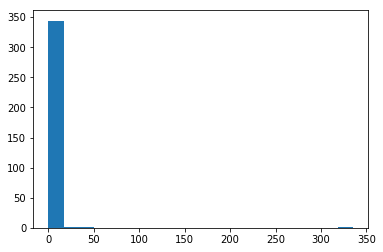

In [159]:
plt.hist(modcrime['Murder'], bins = 20)
plt.show()

In [153]:
#convert str to int for robbery
modcrime['Robbery'] = pd.to_numeric(modcrime.Robbery, errors='coerce')
print (modcrime['Robbery'].head(3))

4   0.000
5   0.000
6   0.000
Name: Robbery, dtype: float64


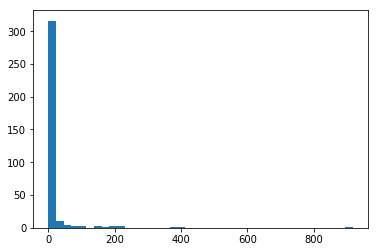

In [162]:
plt.hist(modcrime['Robbery'], bins = 40)
plt.show()

TypeError: set_xticklabels() missing 1 required positional argument: 'labels'

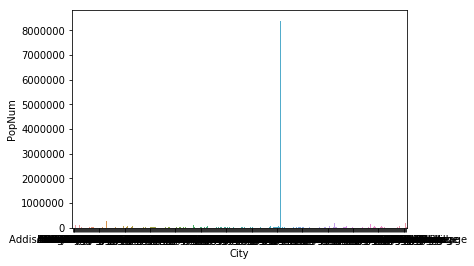

In [142]:
import seaborn as sns
g = sns.barplot(modcrime['City'], modcrime['PopNum'])
g.set_xticklabels(rotation=30)

In [143]:
#create features Population^2
features = pd.get_dummies(modcrime['PopNum'])
features['Population Squared']= (modcrime['PopNum'])**2
print(features['Population Squared'])

4          3463321
5          6640929
6          8099716
7       9595377936
8         40806544
9         16719921
10         3171961
11     13993943616
12        90611361
13       330585124
14         4214809
15        20457529
16          432964
17         6360484
18       743652900
19        11108889
20        55845729
21        29354724
22       236359876
23        32867289
24       310711129
25      1172583049
26      2144060416
27         1988100
28       144024001
29         1044484
30         5405625
31         4218916
32         4264225
33         5560164
          ...     
322       13264164
323         378225
324      148718025
325     3805162596
326      782880400
327       47430769
328      780643600
329        9072144
330       11923209
331       33965584
332       70425664
333       26780625
334      794056041
335      104960025
336        3467044
337       18809569
338     1916425729
339        3229209
340       20921476
341        2999824
342     2008922041
343        6

In [152]:
#create features Population^2
features = pd.get_dummies(modcrime['Murder'])
features['Murder0'] = (modcrime['Murder'] == 0)
features['Murder1'] = (modcrime['Murder'] != 0)
print(features['Murder0'].head(5))
print(features['Murder1'].head(5))

4     True
5     True
6     True
7    False
8     True
Name: Murder0, dtype: bool
4    False
5    False
6    False
7     True
8    False
Name: Murder1, dtype: bool


In [154]:
#create features Robbery
features= pd.get_dummies(modcrime['Robbery'])
features['Robbery0'] = (modcrime['Robbery'] == 0)
features['Robbery1'] = (modcrime['Robbery'] != 0)
print(features['Robbery0'].head(5))
print(features['Robbery1'].head(5))

4     True
5     True
6     True
7    False
8    False
Name: Robbery0, dtype: bool
4    False
5    False
6    False
7     True
8     True
Name: Robbery1, dtype: bool
